# **Table of Contents:** # 

**Introduction**

*     Project introduction
*     Dataset description
*     Import library
*     Import dataset
  
**Initial data exploration**
    
*     Time
*     Age
*     Gender
*     Education
*     Job
*     Experience

**Data Visualisation**
    
*     Country
*     Language
*     Platform
*     Visualisation tool
*     Numerical data
    
**Deep dive into compensation of data scientists**

* Modelling the problem

         - Problem statement
         - Background
         - Method

* Data cleaning and preprocessing

         - Removing invalids
         - Feature engineering
         - Encoding
         - Scaling
         

* Model building

         - Model selection
         - Model evaluation
         - Model tuning


* Project extensions


<font size="6">**Introduction**</font>

**Project introduction**

Data science has often been dubbed the "Sexiest job of the 21st century". Since this does not constitute a substantial reasoning for wanting to dive into datascience, one often wonders, what makes datascience so special? This project seeks to explore and create visualisation for trends within the datascience industry, so as to help us better understand what makes datasciece the hot topic that it is in today's world. 

**Dataset description**

Kaggle set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for 3.5 weeks in October 2020, and garnered 20,036 responses. The dataset can be found in the following link (https://www.kaggle.com/c/kaggle-survey-2020/data).

**Import library**

I have chosen to use the Pandas library in Python as my main from of data analysis and manipulation. For visualisation, a myriad of tools were used, including Tableau, Seaborn, Matplotlib, among others.

For the model building and evaluation, the Sklearn library in Python was adopted.

**Import dataset**

(https://www.kaggle.com/c/kaggle-survey-2020/data)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from IPython.display import Image
import matplotlib_venn as vplt
# warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-compensation-by-country-map/Country_Compensation_Map.png
/kaggle/input/image-respondents-by-country/Country.png
/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf
/kaggle/input/average-compensation-by-country/Country_Compensation.png


In [2]:
all_data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
questions = all_data.loc[0]
all_data.drop(0, axis=0, inplace=True)
pd.set_option('display.max_columns', 500)
all_data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

<font size="6">**Initial Data Exploration**</font> (Data analysis and thoughts)

**Time**

The average time taken to finish the survey is about 15 minutes, and 75% of people finish the survey within 16 minutes.

Here, I had to do some adjustment to the data. Upon inspection of the survey, we note that it seems unreasonable to finish the survey within 3 minutes or take a time longer than 2 hours. As such, we can only deduce that these timings must be due to system error. As we have no good way of determining the timing of these erroneous data, I have taken the liberty to remove them before plotting.

**Age**

More than 56% of the respondents are under 30 years old, and more than 70% are under 35 years old.
We can see from the graph that the median age is between 25 and 29, and since the graph is left-skewed, we deduce that the mean age is greater than that.

This age group is considered to be very young in most industries, but is hardly surprising, as datasciene is a recently emerging field. We note that even though the survey was conducted online, the data should not suffer from much collection bias, since we would expect that people in the datascience industry would generally be acquainted with the internet.

**Gender**

There are 4 times as many males as females who responded in the survey, 52 people who identify themselves as nonbinary, and 263 people who are not comfortable with coming forth about their gender.

The total number of respondants who did not respond as Male or Female make up less than 2% of the total. As such, if we decide to explore deeper into gender differences, dropping these responses should not cause too much hurt to our data.

**Education**

Having a Master's degree is the most common education level for respondents in this survey. More than 75% of repondents have a Bachelor's or Master's degree.

**Job**

Most of the respondents are students (making up 25% of the total). Most of the employed respondents seem to be in the tech industry, which comprises datascience and software engineering. Business analysts and product managers make up only 7-8% of the total responses.

Since less than 14% of repondents do not have a college degree, we deduce that students doing the survey input their education level as the level they are currently studying.

**Country**

India and USA have more than 2000 responses, while the rest of the countries are all below 700. 60% of the reponses are from the top 9 countries, namely, India, USA, Brazil, Japan, Russia, UK, Nigeria, China and Germany.

In [3]:
all_data = all_data.rename(columns = {'Time from Start to Finish (seconds)': 'Time',
                                        'Q1':'Age',
                                        'Q2':'Gender',
                                        'Q3':'Country',
                                        'Q4':'Education',
                                        'Q5':'Job',
                                        'Q6':'Experience'})
exploratory = all_data[['Time','Age', 'Gender', 'Country', 'Education', 'Job', 'Experience']].copy()
exploratory.nunique()

Time          5167
Age             11
Gender           5
Country         55
Education        7
Job             13
Experience       7
dtype: int64

<AxesSubplot:ylabel='Frequency'>

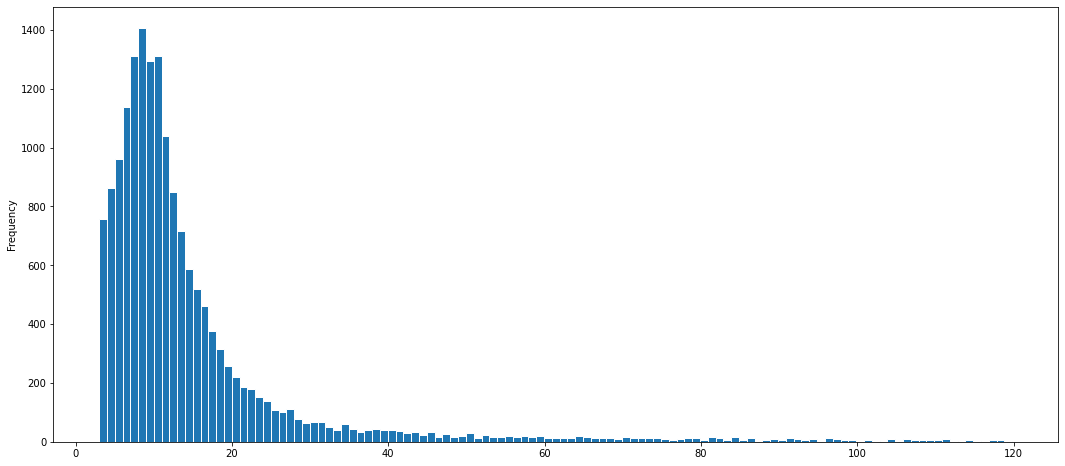

In [4]:
time_minutes = exploratory['Time'].astype(int)/60
time_minutes = time_minutes[time_minutes >3]
time_minutes = time_minutes[time_minutes <120]
time_minutes.plot.hist(figsize = (18,8), ec = 'white', bins = 117)

In [5]:
time_minutes.describe()

count    16993.000000
mean        15.069113
std         15.322507
min          3.016667
25%          7.433333
50%         10.600000
75%         15.983333
max        119.816667
Name: Time, dtype: float64

<AxesSubplot:>

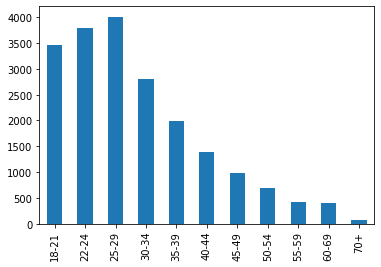

In [6]:
#fig, axs = plt.subplots(2, 2)
#plt.axes(axs[0,0])

# print(sorted(exploratory.Age.unique()))

order_age = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
exploratory['Age'].value_counts().loc[order_age].plot.bar()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Gender, dtype: int64

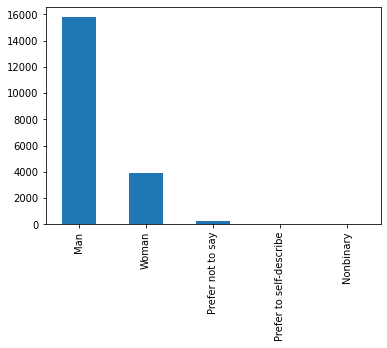

In [7]:
exploratory['Gender'].value_counts().plot(kind='bar')
exploratory.Gender.value_counts()

<AxesSubplot:>

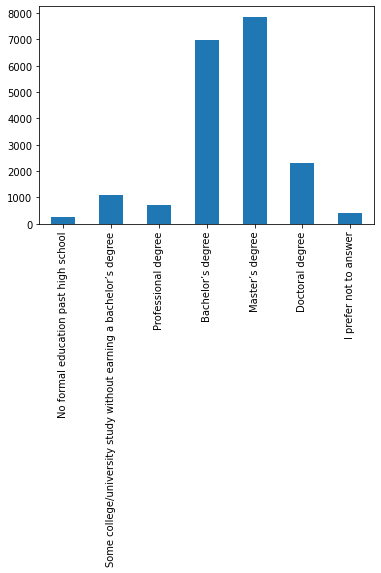

In [8]:
# exploratory.Education.unique()
order_edu = ['No formal education past high school', 'Some college/university study without earning a bachelor’s degree', 'Professional degree', 'Bachelor’s degree', 'Master’s degree', 'Doctoral degree', 'I prefer not to answer']
exploratory['Education'].value_counts().loc[order_edu].plot(kind='bar')

<AxesSubplot:>

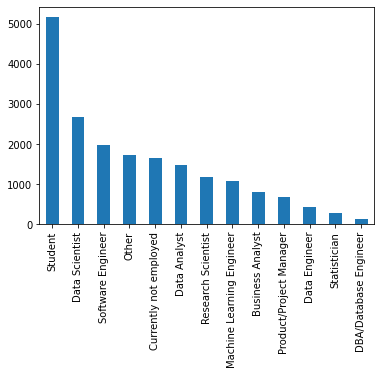

In [9]:
exploratory['Job'].value_counts().plot(kind='bar')

<AxesSubplot:>

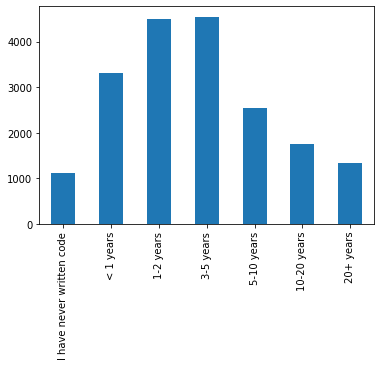

In [10]:
#exploratory.Experience.unique()
order_exp = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
exploratory['Experience'].value_counts().loc[order_exp].plot(kind='bar')

<font size="6">**Data Visualization**</font>

Image generated by Tableau Desktop for data exploration and visualisation:


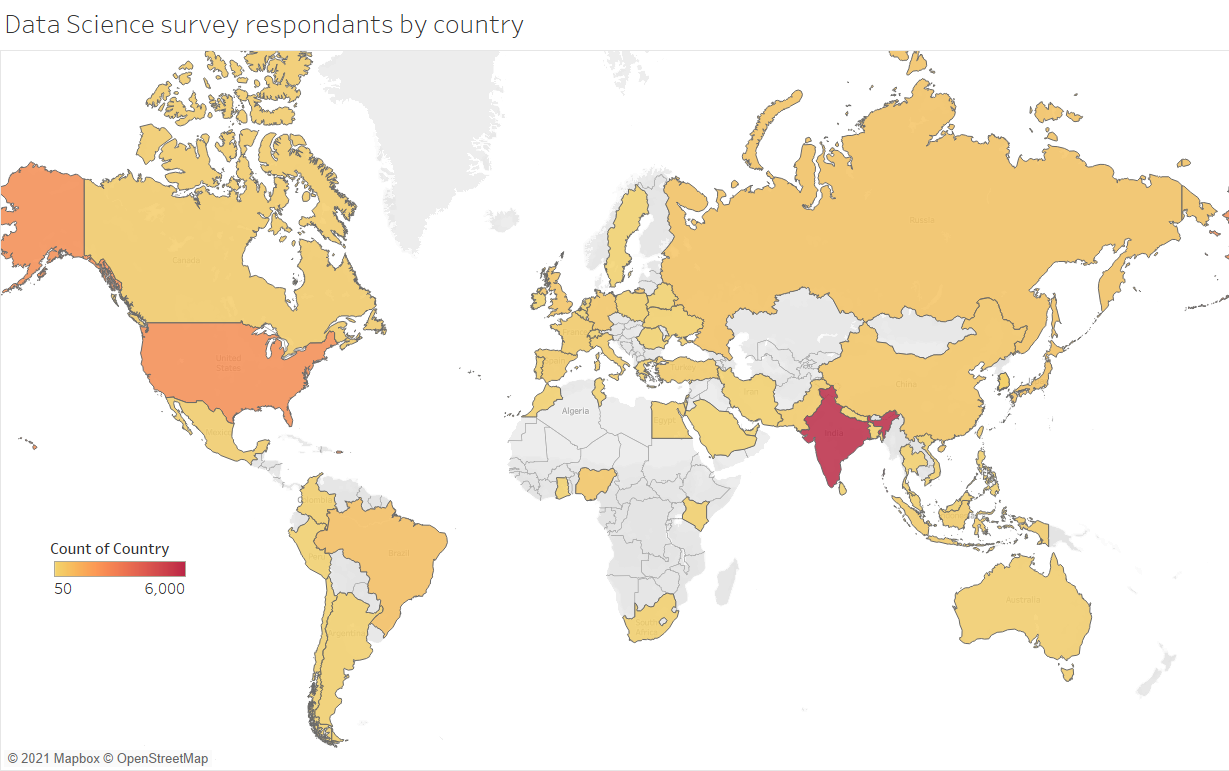

In [11]:
print('Image generated by Tableau Desktop for data exploration and visualisation:')
Image("../input/image-respondents-by-country/Country.png")

In [12]:
#all_data.describe()
prog_language = {}
for i in all_data.columns[7:20]:
    if type(all_data[i].unique()[0]) == str:
        prog_language[i] = 'Language_' + all_data[i].unique()[0]
    else:
        prog_language[i] = 'Language_' + all_data[i].unique()[1]

all_data = all_data.rename(columns = prog_language)
language_visualisation = all_data[all_data.columns[7:20]].notnull().astype('int')
language_visualisation.sum()

Language_Python        15530
Language_R              4277
Language_SQL            7535
Language_C              3315
Language_C++            3827
Language_Java           3367
Language_Javascript     2995
Language_Julia           262
Language_Swift           198
Language_Bash           1776
Language_MATLAB         2217
Language_None            206
Language_Other          1945
dtype: int64

<AxesSubplot:>

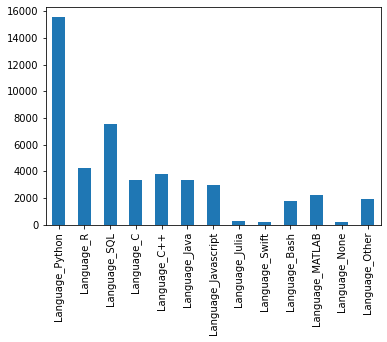

In [13]:
language_visualisation.sum().plot.bar()

In [14]:
language_visualisation['Top_3'] = language_visualisation.Language_Python.astype(str) + language_visualisation.Language_R.astype(str) + language_visualisation.Language_SQL.astype(str)
language_visualisation.Top_3.value_counts()
# Python, R, SQL

100    7364
101    4644
000    3150
111    2023
110    1499
001     601
010     488
011     267
Name: Top_3, dtype: int64

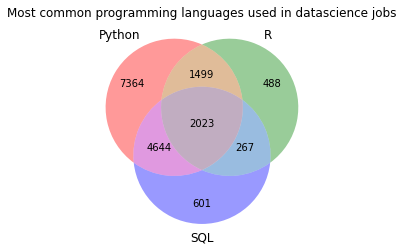

In [15]:
#vplt.venn3(subsets = (7364, 488, 1499, 601, 4644, 267, 2023), set_labels = ('Python', 'R', 'SQL'))
vplt.venn3_unweighted(subsets = (7364, 488, 1499, 601, 4644, 267, 2023), set_labels = ('Python', 'R', 'SQL'))
plt.title('Most common programming languages used in datascience jobs')
plt.show()

In [16]:
prog_IDE = {}

for i in all_data.columns[21:33]:
    if type(all_data[i].unique()[0]) == str:
        prog_IDE[i] = 'IDE_' + all_data[i].unique()[0].strip()
    else:
        prog_IDE[i] = 'IDE_' + all_data[i].unique()[1].strip()

all_data = all_data.rename(columns = prog_IDE)
IDE_visualisation = all_data[all_data.columns[21:33]].notnull().astype('int')
IDE_visualisation.sum()

IDE_Jupyter (JupyterLab, Jupyter Notebooks, etc)    11211
IDE_RStudio                                          3826
IDE_Visual Studio                                    2445
IDE_Visual Studio Code (VSCode)                      5873
IDE_PyCharm                                          5099
IDE_Spyder                                           3290
IDE_Notepad++                                        3132
IDE_Sublime Text                                     2452
IDE_Vim / Emacs                                      1502
IDE_MATLAB                                           1604
IDE_None                                              386
IDE_Other                                            1162
dtype: int64

<AxesSubplot:>

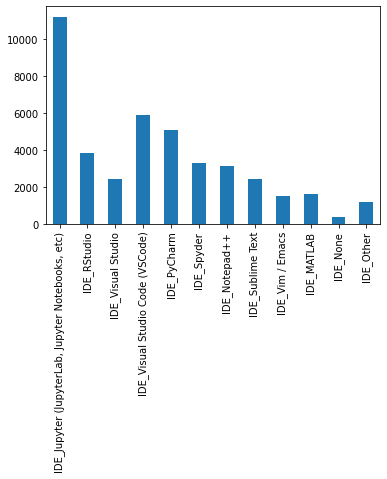

In [17]:
IDE_visualisation.sum().plot.bar()

In [18]:
prog_viz = {}

for i in all_data.columns[53:65]:
    if type(all_data[i].unique()[0]) == str:
        prog_viz[i] = 'Visualisation_' + all_data[i].unique()[0].strip()
    else:
        prog_viz[i] = 'Visualisation_' + all_data[i].unique()[1].strip()

all_data = all_data.rename(columns = prog_viz)
viz_visualisation = all_data[all_data.columns[53:65]].notnull().astype('int')
viz_visualisation.sum()

Visualisation_Matplotlib                 12342
Visualisation_Seaborn                     8821
Visualisation_Plotly / Plotly Express     4130
Visualisation_Ggplot / ggplot2            4120
Visualisation_Shiny                       1137
Visualisation_D3 js                        829
Visualisation_Altair                       233
Visualisation_Bokeh                        920
Visualisation_Geoplotlib                   850
Visualisation_Leaflet / Folium             596
Visualisation_None                        1897
Visualisation_Other                        565
dtype: int64

<AxesSubplot:>

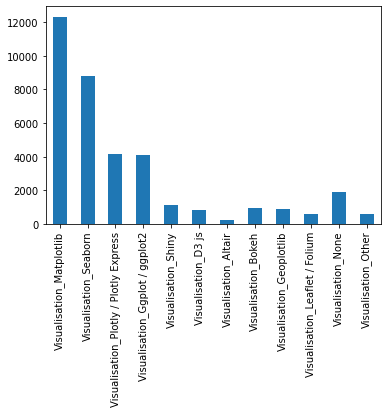

In [19]:
viz_visualisation.sum().plot.bar()

In [20]:
viz_visualisation['Top_2'] = viz_visualisation['Visualisation_Matplotlib'].astype(str) + viz_visualisation['Visualisation_Seaborn'].astype(str)
viz_visualisation['Top_2'].value_counts()

# Matplotlib, Seaborn

11    8289
00    7162
10    4053
01     532
Name: Top_2, dtype: int64

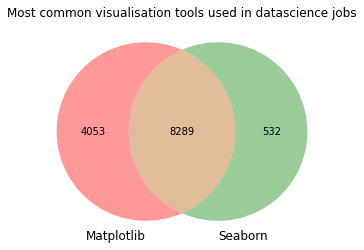

In [21]:
vplt.venn2_unweighted(subsets = (4053, 532, 8289), set_labels = ('Matplotlib', 'Seaborn'))
plt.title('Most common visualisation tools used in datascience jobs')
plt.show()

In [22]:
all_data = all_data.rename(columns = {'Q15': 'Years_ML',
                                      'Q20': 'Company_Size',
                                      'Q21': 'Datascience_Size',
                                      'Q24': 'Compensation',
                                      'Q25': 'Expenditure',
                                     })
data_numeric = all_data[['Age', 'Experience', 'Years_ML', 'Company_Size', 'Datascience_Size', 'Compensation', 'Expenditure']]
data_numeric.head()

,Age,Experience,Years_ML,Company_Size,Datascience_Size,Compensation,Expenditure
1,35-39,5-10 years,1-2 years,NaN,NaN,NaN,NaN
2,30-34,5-10 years,1-2 years,"10,000 or more employees",20+,"100,000-124,999","$100,000 or more ($USD)"
3,35-39,10-20 years,I do not use machine learning methods,"1000-9,999 employees",0,"15,000-19,999",$0 ($USD)
4,30-34,5-10 years,3-4 years,250-999 employees,5-9,"125,000-149,999","$10,000-$99,999"
5,30-34,3-5 years,NaN,NaN,NaN,NaN,NaN


In [23]:
data_numeric['Age'].replace({'70+': '70-80'}, inplace = True)
data_numeric['Age'] = (data_numeric['Age'].str[:2].astype(float) + data_numeric['Age'].str[-2:].astype(float))/2
data_numeric['Experience'].replace({'5-10 years': 7.5,
                                    '10-20 years': 15,
                                    '3-5 years': 4,
                                    '< 1 years': 0.5,
                                    '1-2 years': 1.5,
                                    '20+ years': 25,
                                    'I have never written code': 0}, inplace = True)
data_numeric['Years_ML'].replace({'1-2 years': 1.5,
                                  'I do not use machine learning methods': 0,
                                  '3-4 years': 3.5,
                                  'Under 1 year': 0.5,
                                  '2-3 years': 2.5,
                                  '4-5 years': 4.5,
                                  '5-10 years': 7.5,
                                  '20 or more years': 25,
                                  '10-20 years': 15}, inplace = True)
data_numeric['Company_Size'].replace({'10,000 or more employees': 25000,
                                      '1000-9,999 employees': 5500,
                                      '250-999 employees': 625,
                                      '0-49 employees': 25,
                                      '50-249 employees': 150}, inplace = True)
data_numeric['Datascience_Size'].replace({'20+': 30,
                                          '0': 0,
                                          '5-9': 7,
                                          '1-2': 1.5,
                                          '3-4': 3.5,
                                          '10-14': 12,
                                          '15-19': 17}, inplace = True)
data_numeric['Compensation'].replace({'100,000-124,999': 112500,
                                      '15,000-19,999': 17500,
                                      '125,000-149,999': 137500,
                                      '70,000-79,999': 75000,
                                      '30,000-39,999': 35000,
                                      '90,000-99,999': 95000,
                                      '1,000-1,999': 1500,
                                      '$0-999': 500,
                                      '10,000-14,999': 12500,
                                      '150,000-199,999': 175000,
                                      '60,000-69,999': 65000,
                                      '4,000-4,999': 4500,
                                      '> $500,000': 600000,
                                      '300,000-500,000': 400000,
                                      '40,000-49,999': 45000,
                                      '25,000-29,999': 27500,
                                      '80,000-89,999': 85000,
                                      '7,500-9,999': 8750,
                                      '50,000-59,999': 55000,
                                      '250,000-299,999': 275000,
                                      '5,000-7,499': 6250,
                                      '2,000-2,999': 2500,
                                      '20,000-24,999': 22500,
                                      '200,000-249,999': 225000,
                                      '3,000-3,999': 3500}, inplace = True)
data_numeric['Expenditure'].replace({'$100,000 or more ($USD)': 250000,
                                     '$0 ($USD)': 0,
                                     '$10,000-$99,999': 55000,
                                     '$1-$99': 50,
                                     '$1000-$9,999': 5500,
                                     '$100-$999': 550}, inplace = True)
data_numeric.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Experience,Years_ML,Company_Size,Datascience_Size,Compensation,Expenditure
1,37.0,7.5,1.5,NaN,NaN,NaN,NaN
2,32.0,7.5,1.5,25000.0,30.0,112500.0,250000.0
3,37.0,15.0,0.0,5500.0,0.0,17500.0,0.0
4,32.0,7.5,3.5,625.0,7.0,137500.0,55000.0
5,32.0,4.0,NaN,NaN,NaN,NaN,NaN


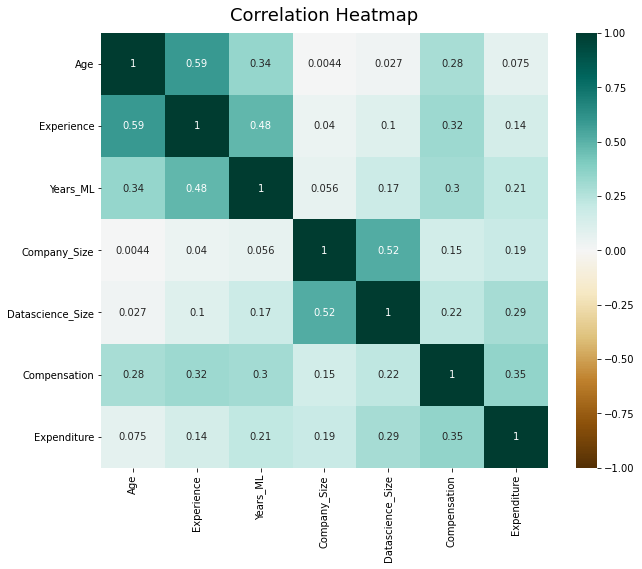

In [24]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [25]:
#data_numeric.to_csv('data_numeric.csv', index = False)

<font size="6">**Deep dive into compensation packages for data scientists**</font>

<font size="5">**Modelling the problem**</font>

**Problem statement**

To build a model that can effectively determine the pay range of a data scientist.

**Background**

As a Master's graduated looking for opportunities to start a career as a data scientist, I would like to use the data at hand to predict the salary of an individual working as a data science proffesional.

**Method**

It is noted that the compensation packages are given in ranges (categorical). While the average can be taken so allow for easier exploration and visualization, it is not conducive to model the problem as a regression problem based on the average of each pay range.

As such, the problem shall be modelled into a classification problem. Key features of the data corresponding to an individual data scientist shall be used to predict the salary. To ensure that overfitting does not occur, cross validation shall be used while training the models, and the model with the best mean cross validation score shall be used. Possible extensions would include fine tuning the model, or blending models to obtain a better accuracy.

<font size = 5>**Data cleaning and preprocessing**</font>

**Removing Invalids**

Firstly, I removed all responses which did not indicate their yearly compensation, since we will be looking specifically at the compensation packages for data scientists.

I have chosen to look at education as academic education, and as such have decided to group 'Professional Degree' into 'No Degree'. Also, I believe that people with university degrees will tend to be alright with disclosing their education level. As such, I theorize that people who do not disclose be of no university degree, or are currently in pursuit of one. I have taken the liberty to group them together.

**Feature Engineering**

I see from above that even though SQL and Seaborn are the second most widely used programming language and visualization packages in the data science industry, the amount of people that rely solely on these are few and far between. As such, I am prompted to engineer 2 new features, Number_Languages and Number_Visualizations, which reflect the number of programming languages and visualisations tools used by the individual.

It is also noted that the average compensation for varies greatly across countries. As such, we have split the countries into 3 different groups, labelled 'Lower_Income_Bracket', 'Middle_Income_Bracket' and 'Upper_Income_Bracket', representing an average monthly compensation of below USD 2000, USD 2000-5000, and above USD 5000. This allows for enough data in each classification, while maintaining the notion that there are differences in compensation by country. Another way would be to one hot encode each country individually, but model accuracy would not be guaranteed, since the data for specific countries might be few. Here, the compensation for an individual data scientist is taken as the middle of its range, to facilitate numerical analysis.

**Encoding**

Here, the get_dummies function in pandas is used to encode the gender and education into ['Gender_Man', 'Gender_Woman', 'Education_Bachelor’s degree', 'Education_Doctoral degree', 'Education_Master’s degree', 'Education_No Degree'].

**Scaling**

I proceed to scale the training data using StandardScaler from the sklearn library. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. The idea behind scaling a dataset is that variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Hence, scaling hopes to reduce this bias.

In [26]:
all_salary = pd.concat([data_numeric.drop(columns = ['Compensation']), all_data[['Compensation', 'Gender', 'Country', 'Education', 'Job']].copy(), language_visualisation, viz_visualisation],axis = 1)

ds_salary = all_salary[all_salary['Job'] == 'Data Scientist'].drop(columns = ['Top_3', 'Top_2'])
ds_salary.dropna(subset = ['Compensation'], inplace = True)

ds_salary.drop(columns = ['Job'], inplace = True)

ds_salary['Education'].replace({'Some college/university study without earning a bachelor’s degree': 'No Degree',
                                'I prefer not to answer': 'No Degree',
                                'Professional degree': 'No Degree',
                                'No formal education past high school': 'No Degree'}, inplace = True)
ds_salary = ds_salary[ds_salary['Gender'].isin(['Man', 'Woman'])]
#ds_salary['Gender'].replace({'Nonbinary': 'Other',
#                             'Prefer to self-describe': 'Other',
#                             'Prefer not to say': 'Other'}, inplace = True)

In [27]:
ds_salary['Number_Languages'] = ds_salary[['Language_Python', 'Language_R', 'Language_SQL', 'Language_C',
       'Language_C++', 'Language_Java', 'Language_Javascript',
       'Language_Julia', 'Language_Swift', 'Language_Bash', 'Language_MATLAB', 'Language_Other']].sum(axis = 1)

ds_salary['Number_Visualisation'] = ds_salary[['Visualisation_Matplotlib',
       'Visualisation_Seaborn', 'Visualisation_Plotly / Plotly Express',
       'Visualisation_Ggplot / ggplot2', 'Visualisation_Shiny',
       'Visualisation_D3 js', 'Visualisation_Altair', 'Visualisation_Bokeh',
       'Visualisation_Geoplotlib', 'Visualisation_Leaflet / Folium', 'Visualisation_Other',]].sum(axis = 1)

ds_salary = ds_salary[(ds_salary['Number_Languages'] != 0) | (ds_salary['Language_None'] == 1)]
# it dont make sense to not be using any coding language and not have 'None' checked.

ds_salary.drop(columns = ['Language_Python', 'Language_R', 'Language_SQL', 'Language_C',
       'Language_C++', 'Language_Java', 'Language_Javascript',
       'Language_Julia', 'Language_Swift', 'Language_Bash', 'Language_MATLAB', 'Language_Other', 'Language_None'], inplace = True)
ds_salary.drop(columns = ['Visualisation_Matplotlib',
       'Visualisation_Seaborn', 'Visualisation_Plotly / Plotly Express',
       'Visualisation_Ggplot / ggplot2', 'Visualisation_Shiny',
       'Visualisation_D3 js', 'Visualisation_Altair', 'Visualisation_Bokeh',
       'Visualisation_Geoplotlib', 'Visualisation_Leaflet / Folium', 'Visualisation_Other', 'Visualisation_None'], inplace = True)
#ds_salary.to_csv('ds_salary.csv', index = False)

Image generated by Tableau Desktop for data exploration and visualisation:


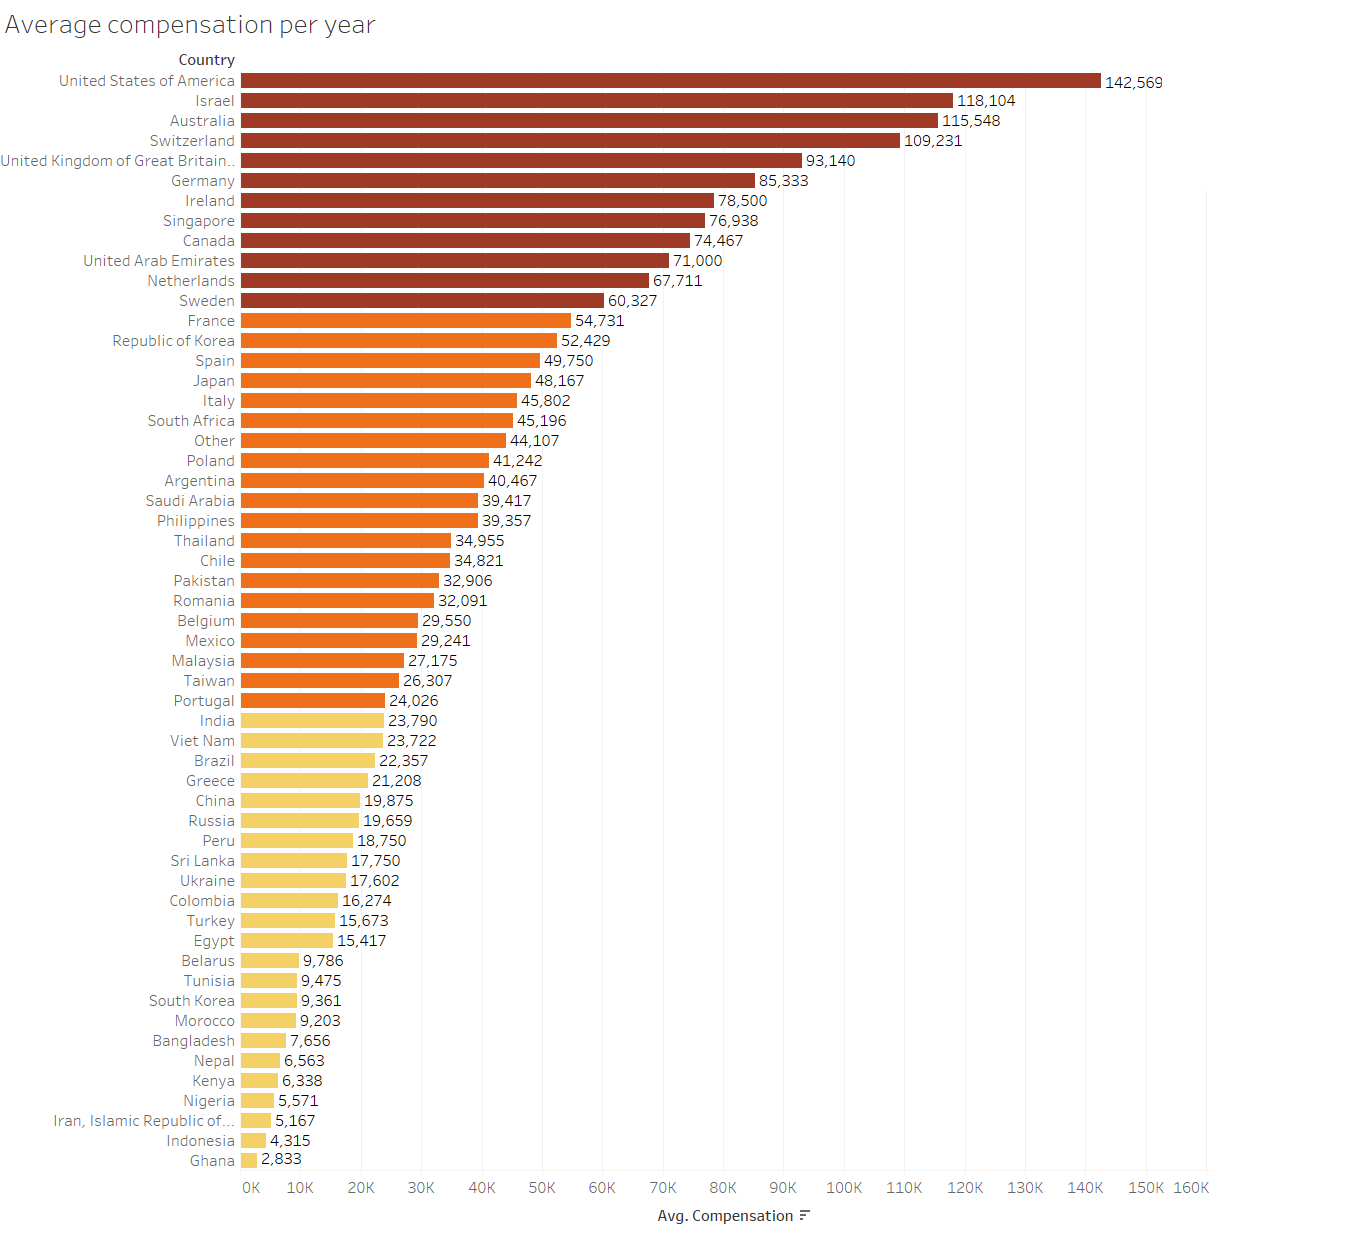

In [28]:
print('Image generated by Tableau Desktop for data exploration and visualisation:')
Image("../input/average-compensation-by-country/Country_Compensation.png")

Image generated by Tableau Desktop for data exploration and visualisation:


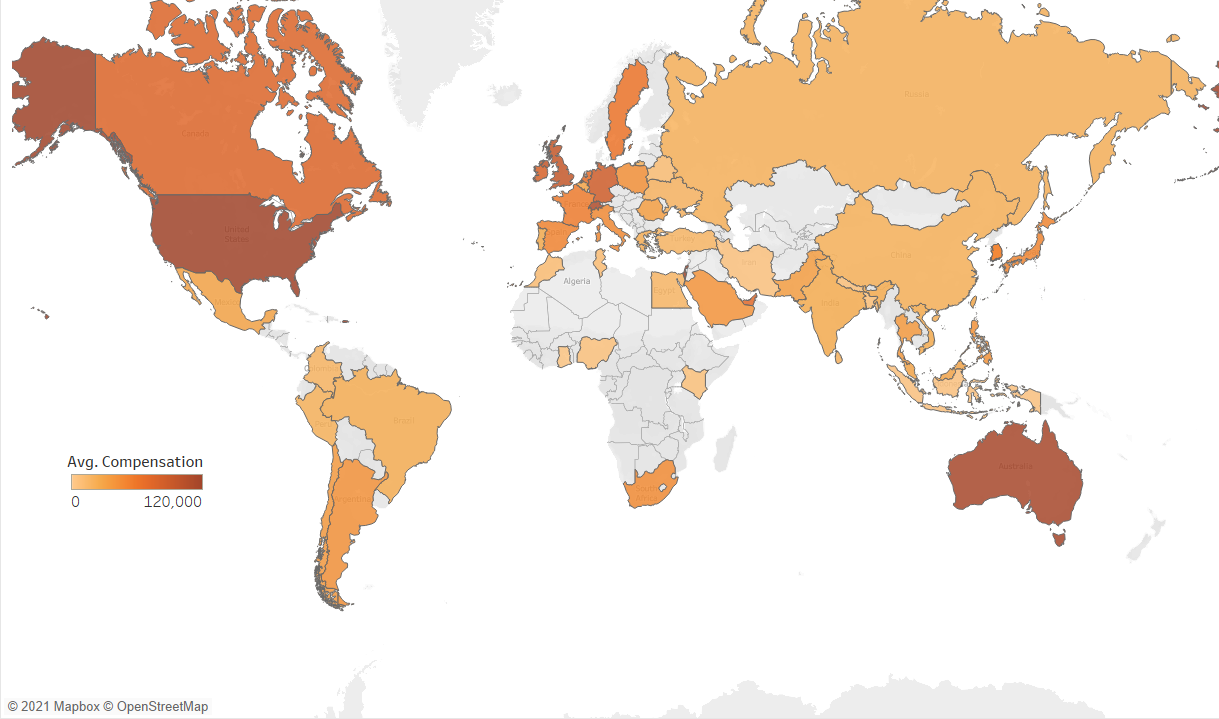

In [29]:
print('Image generated by Tableau Desktop for data exploration and visualisation:')
Image("../input/average-compensation-by-country-map/Country_Compensation_Map.png")

In [30]:
upper_income = ['Australia', 'Canada', 'Germany', 'Ireland', 'Israel', 'Netherlands', 'Singapore', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
middle_income = ['Argentina', 'Belgium', 'Chile', 'France', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Other', 'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Saudi Arabia', 'South Africa', 'Spain', 'Taiwan', 'Thailand']
lower_income = ['Bangladesh', 'Belarus', 'Brazil', 'China', 'Colombia', 'Egypt', 'Ghana', 'Greece', 'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Kenya', 'Morocco', 'Nepal', 'Nigeria', 'Peru', 'Russia', 'South Korea', 'Sri Lanka', 'Tunisia', 'Turkey', 'Ukraine', 'Viet Nam']

ds_salary.loc[ds_salary['Country'].isin(upper_income), 'Upper_Income_Bracket'] = 1
ds_salary.loc[ds_salary['Country'].isin(middle_income), 'Middle_Income_Bracket'] = 1
ds_salary.loc[ds_salary['Country'].isin(lower_income), 'Lower_Income_Bracket'] = 1
#ds_salary.count()
ds_salary.drop(columns = ['Country'], inplace = True)
ds_salary = ds_salary.fillna(0)
ds_salary.head()

,Age,Experience,Years_ML,Company_Size,Datascience_Size,Expenditure,Compensation,Gender,Education,Number_Languages,Number_Visualisation,Upper_Income_Bracket,Middle_Income_Bracket,Lower_Income_Bracket
4,32.0,7.5,3.5,625.0,7.0,55000.0,"125,000-149,999",Man,Master’s degree,3,3,1.0,0.0,0.0
9,37.0,7.5,2.5,5500.0,30.0,55000.0,"70,000-79,999",Man,Doctoral degree,3,4,1.0,0.0,0.0
22,32.0,0.5,0.5,150.0,1.5,5500.0,$0-999,Man,Bachelor’s degree,2,3,0.0,0.0,1.0
38,23.0,4.0,1.5,5500.0,1.5,5500.0,"4,000-4,999",Man,Master’s degree,4,1,0.0,0.0,1.0
40,19.5,4.0,2.5,25.0,30.0,5500.0,"> $500,000",Man,Bachelor’s degree,3,3,0.0,0.0,1.0


In [31]:
ds_salary.Compensation.unique()

array(['125,000-149,999', '70,000-79,999', '$0-999', '4,000-4,999',
       '> $500,000', '60,000-69,999', '40,000-49,999', '80,000-89,999',
       '100,000-124,999', '250,000-299,999', '50,000-59,999',
       '5,000-7,499', '2,000-2,999', '20,000-24,999', '15,000-19,999',
       '25,000-29,999', '10,000-14,999', '200,000-249,999',
       '300,000-500,000', '150,000-199,999', '90,000-99,999',
       '30,000-39,999', '1,000-1,999', '7,500-9,999', '3,000-3,999'],
      dtype=object)

<AxesSubplot:>

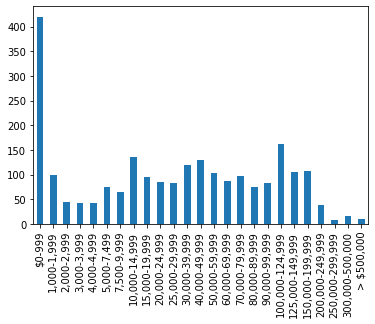

In [32]:
order_salary = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', 
'10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', 
'50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', 
'125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']

ds_salary['Compensation'].value_counts().loc[order_salary].plot(kind='bar')

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

ds_salary['Compensation'].replace({'$0-999': 'under_60k',
                                    '1,000-1,999': 'under_60k',
                                    '2,000-2,999': 'under_60k',
                                    '3,000-3,999': 'under_60k',
                                    '4,000-4,999': 'under_60k',
                                    '5,000-7,499': 'under_60k',
                                    '7,500-9,999': 'under_60k',
                                    '10,000-14,999': 'under_60k',
                                    '15,000-19,999': 'under_60k',
                                    '20,000-24,999': 'under_60k',
                                    '25,000-29,999': 'under_60k',
                                    '30,000-39,999': 'under_60k',
                                    '40,000-49,999': 'under_60k',
                                    '50,000-59,999': 'under_60k',
                                    '60,000-69,999': '60k_125k',
                                    '70,000-79,999': '60k_125k',
                                    '80,000-89,999': '60k_125k',
                                    '90,000-99,999': '60k_125k',
                                    '100,000-124,999': '60k_125k',
                                    '125,000-149,999': 'above_125k',
                                    '150,000-199,999': 'above_125k',
                                    '200,000-249,999': 'above_125k',
                                    '250,000-299,999': 'above_125k',
                                    '300,000-500,000': 'above_125k',
                                    '> $500,000': 'above_125k'}, inplace = True)

# ds_salary['Compensation'].value_counts()
ds_salary = ds_salary.fillna(0)

Y = ds_salary['Compensation']
X = pd.get_dummies(ds_salary.drop(columns = ['Compensation']))
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

<font size = 5>**Model Building**</font>

**Model Selection**

The below 5 classification models are tested, using cross validation to ensure that the models do not overfit:

    Gaussian Naive Bayes
    Logistic Regression
    K Nearest Neighbours
    Random Forest
    Support Vector Machines
    
**Model Evaluation**

The mean score of each set (5-fold cross-validation scores) were taken, and the model with the highest accuracy (Random Forest Classifier) was taken to undergo hypertuning.

**Model Tuning**

For the tuning process, the below parameters were considered:

<font size = 4>**n_estimators**</font>:
        Number of trees in random forest
        
<font size = 4>**max_features**</font>:        
        Number of features to consider at every split
        
<font size = 4>**max_depth**</font>:        
        Maximum number of levels in tree
        
<font size = 4>**min_samples_split**</font>:        
        Minimum number of samples required to split a node
        
<font size = 4>**min_samples_leaf**</font>:        
        Minimum number of samples required at each leaf node
        
<font size = 4>**bootstrap**</font>:        
        Method of selecting samples for training each tree
        
To shorten the running time, a randomized grid search was used, and the model contributing the best accuracy was adopted as the fine tuned model.


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [35]:
#Naive Bayes
gnb = GaussianNB()
cross_val_NB = cross_val_score(gnb, X_Scaled, Y, cv=5)
print('cross_val_NB:')
print(cross_val_NB)
print('mean: ', cross_val_NB.mean())

lr = LogisticRegression()
cross_val_LR = cross_val_score(lr, X_Scaled, Y, cv=5)
print('cross_val_LR:')
print(cross_val_LR)
print('mean: ', cross_val_LR.mean())

kn = KNeighborsClassifier()
cross_val_KN = cross_val_score(kn, X_Scaled, Y, cv=5)
print('cross_val_KN:')
print(cross_val_KN)
print('mean: ', cross_val_KN.mean())

rf = RandomForestClassifier()
cross_val_RF = cross_val_score(rf, X_Scaled, Y, cv=5)
print('cross_val_RF:')
print(cross_val_RF)
print('mean: ', cross_val_RF.mean())

sv = SVC(probability = True)
cross_val_SV = cross_val_score(sv, X_Scaled, Y,cv=5)
print('cross_val_SV:')
print(cross_val_SV)
print('mean: ', cross_val_SV.mean())

cross_val_NB:
[0.70449679 0.71092077 0.72591006 0.7167382  0.75321888]
mean:  0.7222569409342806
cross_val_LR:
[0.74089936 0.76017131 0.75588865 0.78540773 0.7639485 ]
mean:  0.7612631075902253
cross_val_KN:
[0.74518201 0.74089936 0.72591006 0.73175966 0.74034335]
mean:  0.7368188877962706
cross_val_RF:
[0.75588865 0.76017131 0.75802998 0.76824034 0.78111588]
mean:  0.7646892317872274
cross_val_SV:
[0.74304069 0.75588865 0.74304069 0.76824034 0.77253219]
mean:  0.7565485107204235


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [37]:
import datetime 

print(datetime.datetime.now())

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_Scaled, Y)

print(datetime.datetime.now())

2021-07-05 14:48:51.894510
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
2021-07-05 14:57:54.513890


In [38]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': True}

In [39]:
rf_tuned = RandomForestClassifier(n_estimators = rf_random.best_params_['n_estimators'],
                                  min_samples_split = rf_random.best_params_['min_samples_split'],
                                  min_samples_leaf = rf_random.best_params_['min_samples_leaf'],
                                  max_features = rf_random.best_params_['max_features'],
                                  max_depth = rf_random.best_params_['max_depth'],
                                  bootstrap = rf_random.best_params_['bootstrap'])
cross_val_RF_tuned = cross_val_score(rf_tuned, X_Scaled, Y, cv=5)
print('cross_val_RF_tuned')
print(cross_val_RF_tuned)
print(cross_val_RF_tuned.mean())

cross_val_RF_tuned
[0.76231263 0.78800857 0.76659529 0.77038627 0.80257511]
0.7779755723226511


<font size = 6>**Possible project extensions**</font>

* Modelling the problem

As with everything, the perspective to look at any dataset depends on the individual. Here, I have chosen to look specifically at yearly compensation for data scientists jobs. However, there are many other fields that one could explore, for example, yearly compensation of people who work in USA, or even the amount an organization spends on data science.

Another aspect that can be looked into is modelling the problem as a regression problem rather than a classification. However, since the yearly compensation is given in ranges, more work must be done in order to build regression models that have a certain degree of accuracy. Even as a classification problem, the number of classes can be chosen differently (Here, 3 classes are chosen, namely, under USD 60,000 per year, USD 60,000 - USD 125,000 a year, and above USD 125,000 a year). Of course, more classes would constitute to a tighter range one can classify the data to, which would indicate a more precise estimation of an individuals compensation, at the expense of model accuracy.

* Data cleaning and preprocessing

One field to look at for removing invalid data might be the time a respondent takes to finish the survey. Since the survey is not short, one would not expect that the survey be finished within seconds. The survey is also not long enough to warrant days to finish. As such, we can pinpoint slipshod reponses using the time taken to finish the survey. However, I have chosen to use the above to determine such responses. Also, I understand that these dubious timings may arise due to machine error, and after deliberation, decided against omiting such responses.

Feature engineering is another aspect that has endless possiblities, and is one of the characteristics that make  a project unique. Given more time and inspiration, one can always think of new features that might correspond to a more accurate model. Following which, it is also noted that there are many forms of scaling, which can be looked into. Here, we used a standard scaler to transform the data, but it would be interesting to see how different scalers affect the results and accuracy of the models.

* Others

There are considerably more data scientists receiving yearly compensations of below USD 1000 than any other compensation ranges. This works out to roughly below USD 83 per month, which we understand is insufficient for living expenses in many countries. Also, in these countries, it seems odd that an organization would offer that amount as a salary. Hence, I deduce that these people are either not receiving compensation, or only receiving a token sum. Since many of these people work in organizations that have very few employees, I hypothesize that they may be entrepreneurs working in their own start-ups, or helping a friend. Else, they may be doing data science on the side for their organization, and are paid only for their main job. Hence, one further region to explore would be to omit these individuals, and only calculate those who work professionally, and are fully employed as a data scientist.